<a href="https://colab.research.google.com/github/in123-new/machine-learning/blob/main/knn_mnist_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### En ligne importation

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

/usr/local/lib/python3.7/dist-packages/sklearn/datasets/_openml.py:65: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


In [ ]:
print (mnist.data.shape)
print (mnist.target.shape)
data=mnist.data
data.head()

(70000, 784)
(70000,)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
target=mnist.target
target.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

#### to create a sample with 5000 examples randomly selected

In [ ]:
sample = np.random.randint(70000, size=5000)

In [ ]:
sample

array([52577, 19621, 67789, ..., 56367, 31224,  7166])

In [ ]:
data = mnist.data.values[sample]
target = mnist.target.values[sample]
print(data.shape)
print(target.shape)

(5000, 784)
(5000,)


#### Data spliting 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, train_size=0.8)
print(x_test.shape)
print(y_test.shape)

(1000, 784)
(1000,)


### Hors ligne importation

In [ ]:
data_train=pd.read_csv('MNIST_train.csv')
data_test=pd.read_csv('MNIST_test.csv')
print(data_train.shape)
print(data_test.shape)

(60000, 785)
(10000, 785)


In [ ]:
data_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### to create a sample with 4000 and 1000 examples randomly selected

In [ ]:
sample_train = np.random.randint(60000, size=4000)
sample_test = np.random.randint(10000, size=1000)

In [ ]:
data_train_sample=data_train.values[sample_train]
data_test_sample=data_test.values[sample_test]
print(data_train_sample.shape)
print(data_test_sample.shape)

(4000, 785)
(1000, 785)


### data spliting

In [ ]:
x_train=data_train_sample[:,1:785]
y_train=data_train_sample[:,0:1]
print(x_train.shape)
print(y_train.shape)

(4000, 784)
(4000, 1)


In [ ]:
x_test=data_test_sample[:,1:785]
y_test=data_test_sample[:,0:1]
print(x_test.shape)
print(y_test.shape)

(1000, 784)
(1000, 1)


### Data Normalisation

In [ ]:
from sklearn.preprocessing import MinMaxScaler 

In [ ]:
scaller=MinMaxScaler()
scaller.fit(x_train)
x_train=scaller.transform(x_train)
scaller.fit(x_test)
x_test=scaller.transform(x_test)

In [ ]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### model training and score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train.ravel())

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print(knn.score(x_test,y_test.ravel()))

0.934


#### la selection de l'hyper parametre k :(using test set => probleme de generalisation ??)

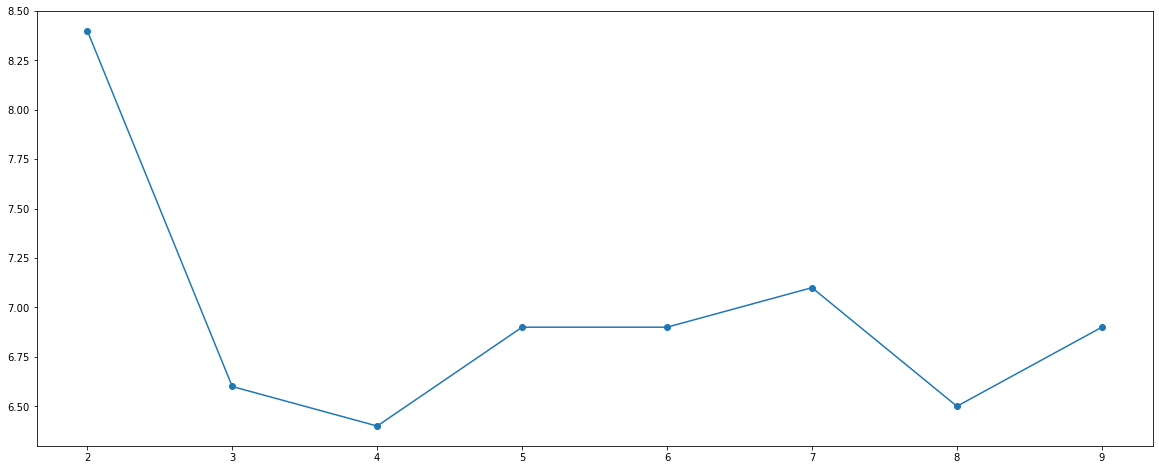

In [ ]:
errors = []
for k in range(2,10):
    knn = KNeighborsClassifier(k)
    errors.append(100*(1-knn.fit(x_train, y_train.ravel()).score(x_test, y_test.ravel())))
plt.figure(figsize=(20,8))
plt.plot(range(2,10),errors, 'o-') # 'o-' pour l'affichage des k sur le graphe
plt.show()

In [ ]:
minimum = errors[0]
index=0
for i in range (0,len(errors)):
    if errors[i] < minimum:
        minimum = errors[i]
        index=i
print(f"The minimum value is: {minimum}")
print(f"The k value is: {index+2}")

The minimum value is: 6.399999999999995
The k value is: 4


### Prediction

In [ ]:
knn = KNeighborsClassifier(4)
knn.fit(x_train, y_train.ravel())

KNeighborsClassifier(n_neighbors=4)

In [ ]:
knn.score(x_test,y_test)

0.936

In [ ]:
predicted = knn.predict(x_test)

In [ ]:
predicted.shape

(1000,)

In [ ]:
predicted[0:5]

array([0, 6, 5, 8, 1], dtype=int64)

#### On redimensionne les données de test sous forme d'une matrice : 784=28*28

In [ ]:
images = x_test.reshape((-1,28, 28))
images.shape

(1000, 28, 28)

#### On selectionne un echantillon de 12 images au hasard parmi les 1000

In [ ]:
select = np.random.randint(images.shape[0], size=12)
select

array([178, 467, 812, 905, 839, 908, 213, 251, 161, 658, 514, 666])

#### On affiche les images avec les prédictions associées

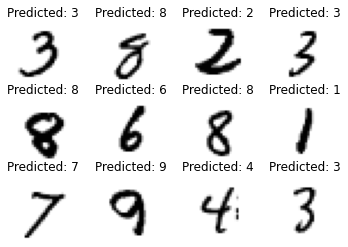

In [ ]:
fig,ax = plt.subplots(3,4)
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r) #interpolation='nearest'
    plt.title('Predicted: {}'.format(predicted[value]) )
plt.show()

### Cross Validation: the correct way to select the k using only the trainset

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
KNN_model=KNeighborsClassifier(n_neighbors=1)
cross_val_score(KNN_model,x_train,y_train.ravel(),cv=5,scoring='accuracy')

array([0.915  , 0.9075 , 0.9425 , 0.9425 , 0.92125])

In [ ]:
KNN_model=KNeighborsClassifier(n_neighbors=2)
cross_val_score(KNN_model,x_train,y_train.ravel(),cv=5,scoring='accuracy')

array([0.9025 , 0.8975 , 0.91875, 0.915  , 0.90875])

In [ ]:
KNN_model=KNeighborsClassifier(n_neighbors=3)
cross_val_score(KNN_model,x_train,y_train.ravel(),cv=5,scoring='accuracy')

array([0.9275 , 0.90875, 0.93875, 0.9325 , 0.92   ])

### Curve Validation : to simplify cross-valudation

In [ ]:
from sklearn.model_selection import validation_curve

In [ ]:
k=np.arange(2,11)
k

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
print(x_train.shape)
print(y_train.shape)

(4000, 784)
(4000, 1)


In [ ]:
KNN_model=KNeighborsClassifier()
train_score,val_score=validation_curve(KNN_model,x_train,y_train.ravel(),param_name='n_neighbors',param_range=k,cv=5,scoring='accuracy')

In [ ]:
val_score.mean(axis=1)

array([0.9085 , 0.9255 , 0.92125, 0.92125, 0.921  , 0.92075, 0.917  ,
       0.9165 , 0.91275])

In [ ]:
val_score.mean(axis=1).argmax()

1

In [ ]:
train_score.mean(axis=1)

array([0.95825  , 0.9628125, 0.9508125, 0.95     , 0.9414375, 0.940375 ,
       0.936375 , 0.933625 , 0.93075  ])

In [ ]:
train_score.mean(axis=1).argmax()

1

### Drawing the graph of accuracy

#### we can say that we get the best scores  when k=3

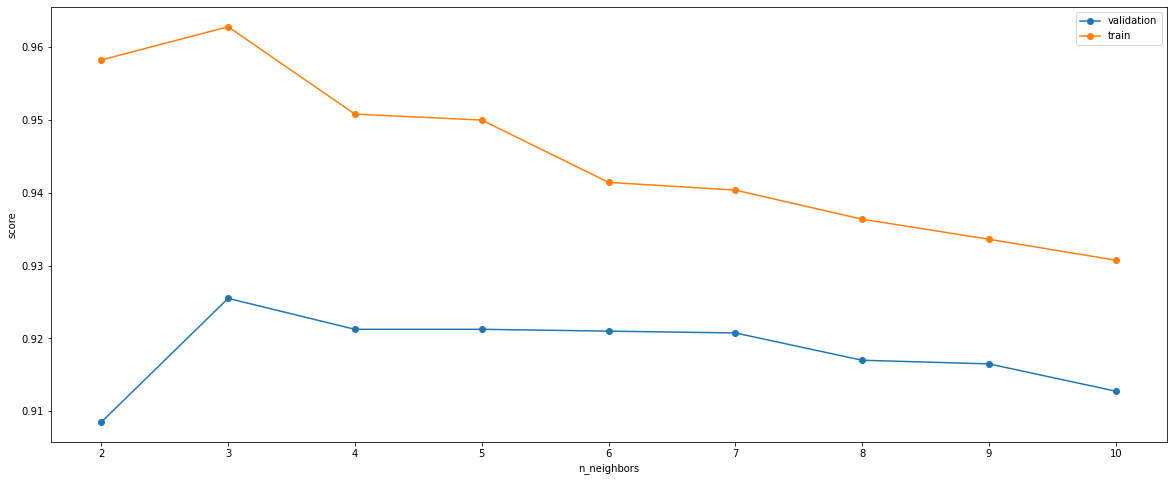

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(range(2,11),val_score.mean(axis=1),'o-',label='validation')
plt.plot(range(2,11),train_score.mean(axis=1),'o-',label='train')
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.legend()

### GridSearchCV : to find best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'n_neighbors': np.arange(2,11),'metric':['euclidean','manhattan']}
grid=GridSearchCV(KNN_model,param_grid,cv=5)
grid.fit(x_train,y_train.ravel())

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [ ]:
grid.best_score_

0.9255000000000001

In [ ]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 3}

In [ ]:
KNNmodel_best=grid.best_estimator_

In [ ]:
KNNmodel_best.score(x_test,y_test)

0.934

### Matrice de confusion

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
matrice_confusion=confusion_matrix(y_test,KNNmodel_best.predict(x_test))

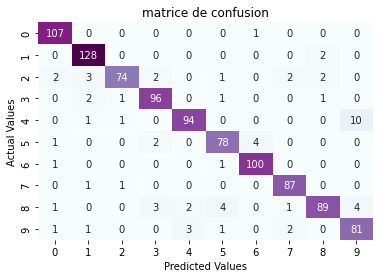

In [ ]:
sns.heatmap(matrice_confusion,annot=True, fmt='g', cbar=False, cmap='BuPu')
#plt.imshow(matrice_confusion)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('matrice de confusion')
plt.show()

#### Now we test the final model using test data: this test generally used to compare KNN with another model

In [ ]:
KNN_model=KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(x_train,y_train.ravel())
KNN_model.score(x_test,y_test.ravel())

0.934

#### brobleme biais-variance !!!
#### using trainset k=3 seems to be the best KNN but when we use a new dataset k=4 seems to be the best one

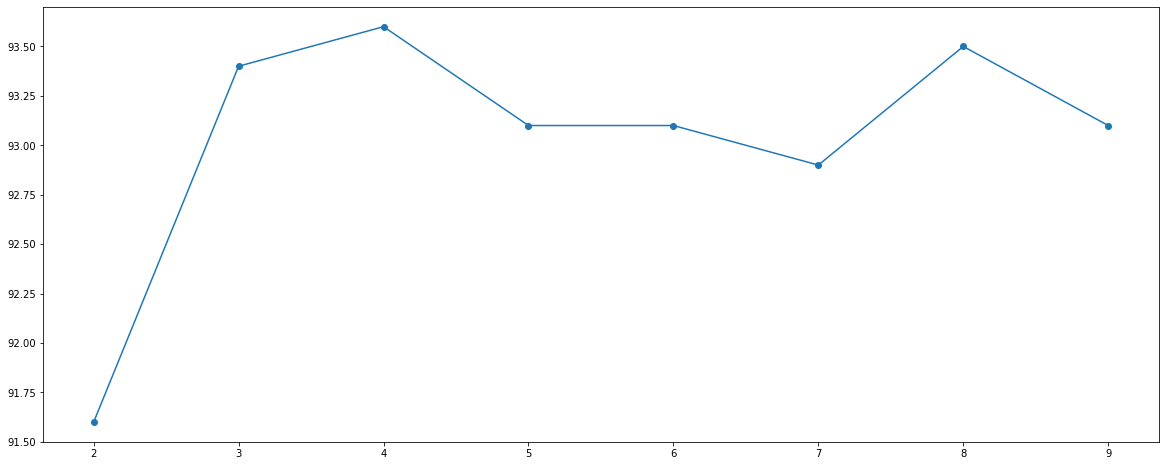

In [ ]:
scores = []
for k in range(2,10):
    knn = KNeighborsClassifier(k)
    scores.append(100*knn.fit(x_train, y_train.ravel()).score(x_test, y_test.ravel()))
plt.figure(figsize=(20,8))
plt.plot(range(2,10), scores, 'o-')
plt.show()